How to fix paddleocr installation error:
- `brew install mupdf swig freetype`
- `pip install https://github.com/pymupdf/PyMuPDF/archive/master.tar.gz`

In [1]:
# Setup path in .env file
import os
from dotenv import load_dotenv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from paddleocr import PaddleOCR, draw_ocr

# Get absolut path to proeject root
project_root = os.getenv("PROJECT_ROOT")
data_path = os.getenv("PUBTABNET_DATA_DIR")

project_root_dir = os.path.dirname(os.path.abspath("../"))
print("Project root dir:", project_root_dir)
data_dir = os.getenv("PUBTABNET_DATA_DIR")
absolute_dir = project_root_dir + data_dir

print("Absolute path:", absolute_dir)


Project root dir: /Users/leonremke/Documents/GIT_REPOS/UNI/neural_networks_seminar
Absolute path: /Users/leonremke/Documents/GIT_REPOS/UNI/neural_networks_seminar/pubtabnet


/Users/leonremke/Documents/GIT_REPOS/UNI/neural_networks_seminar/pubtabnet/test/PMC515297_004_00.png


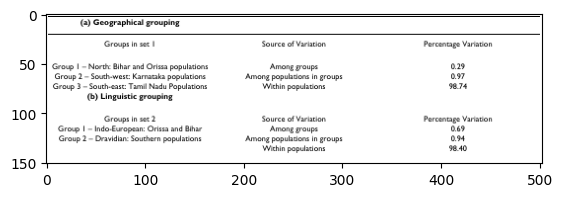

In [2]:
# Test load the image and display it
img_name = "PMC515297_004_00.png"
img_path = f"{absolute_dir}/test/{img_name}"
print(img_path)
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `french`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='en', use_gpu=False) # need to run only once to download and load model into memory
result = ocr.ocr(img_path, cls=True)
print("Result of PaddleOCR:")
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

[2023/08/12 12:40:00] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/leonremke/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/leonremke/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25

KeyboardInterrupt: 

In [ ]:
# draw result
from PIL import Image
result = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='simfang.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result_' + img_name + '.jpg')

In [ ]:
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `french`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='en', use_gpu=False) # need to run only once to download and load model into memory
img_name = "PMC515297_004_00.png"
img_path = '/Users/leonremke/Documents/GIT_REPOS/UNI/neural_networks_seminar/pubtabnet/test/' + img_name
result = ocr.ocr(img_path, rec=False)
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

# draw result
result = result[0]
image = Image.open(img_path).convert('RGB')
im_show = draw_ocr(image, result, txts=None, scores=None, font_path='/path/to/PaddleOCR/doc/fonts/simfang.ttf')
im_show = Image.fromarray(im_show)
im_show.save('structure_result_' + img_name + '.jpg')

[2023/08/10 17:39:45] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, shape_info_filename=None, precision='fp32', gpu_mem=500, image_dir=None, det_algorithm='DB', det_model_dir='/Users/leonremke/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_box_type='quad', det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, det_fce_box_type='poly', rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/leonremke/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_shape='3, 48, 320', rec_batch_num=6, 

## TEDS Distance
https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.6/ppstructure/table/README.md#43-calculate-teds

Find a script for paddleocr to html inside `convert_labelo2html.py`. It is from the library itself, but I dont know how to call it.

In [3]:
test_coordinates = [
    [[218.0, 131.0], [285.0, 132.0], [285.0, 143.0], [218.0, 142.0]],
    [[406.0, 130.0], [430.0, 130.0], [430.0, 144.0], [406.0, 144.0]],
    [[12.0, 122.0], [158.0, 122.0], [158.0, 131.0], [12.0, 131.0]],
    [[200.0, 120.0], [302.0, 121.0], [302.0, 134.0], [199.0, 133.0]],
    [[407.0, 120.0], [429.0, 120.0], [429.0, 134.0], [407.0, 134.0]],
    [[225.0, 112.0], [278.0, 112.0], [278.0, 123.0], [225.0, 123.0]],
    [[10.0, 111.0], [160.0, 111.0], [160.0, 124.0], [10.0, 124.0]],
    [[407.0, 110.0], [429.0, 110.0], [429.0, 125.0], [407.0, 125.0]],
    [[382.0, 102.0], [454.0, 102.0], [454.0, 112.0], [382.0, 112.0]],
    [[217.0, 102.0], [286.0, 102.0], [286.0, 112.0], [217.0, 112.0]],
    [[57.0, 100.0], [114.0, 100.0], [114.0, 113.0], [57.0, 113.0]],
    [[40.0, 78.0], [131.0, 78.0], [131.0, 91.0], [40.0, 91.0]],
    [[5.0, 70.0], [164.0, 70.0], [164.0, 79.0], [5.0, 79.0]],
    [[407.0, 69.0], [429.0, 69.0], [429.0, 80.0], [407.0, 80.0]],
    [[219.0, 69.0], [285.0, 69.0], [285.0, 79.0], [219.0, 79.0]],
    [[200.0, 59.0], [303.0, 59.0], [303.0, 71.0], [200.0, 71.0]],
    [[6.0, 59.0], [164.0, 59.0], [164.0, 71.0], [6.0, 71.0]],
    [[407.0, 57.0], [429.0, 57.0], [429.0, 71.0], [407.0, 71.0]],
    [[226.0, 49.0], [277.0, 49.0], [277.0, 59.0], [226.0, 59.0]],
    [[408.0, 48.0], [428.0, 48.0], [428.0, 59.0], [408.0, 59.0]],
    [[3.0, 46.0], [166.0, 47.0], [166.0, 60.0], [3.0, 59.0]],
    [[381.0, 25.0], [453.0, 25.0], [453.0, 36.0], [381.0, 36.0]],
    [[218.0, 25.0], [285.0, 25.0], [285.0, 36.0], [218.0, 36.0]],
    [[59.0, 25.0], [112.0, 25.0], [112.0, 36.0], [59.0, 36.0]],
    [[33.0, 4.0], [137.0, 4.0], [137.0, 16.0], [33.0, 16.0]]
]


In [4]:
from PIL import Image


def crop_images(coordinates_list, file_path):
    # Load the input image (adjust the path accordingly)
    input_image = Image.open(file_path)

    # Initialize an array to store cropped images
    cropped_img_paths = []

    for coords in coordinates_list:
        # Convert coordinates to integers
        coords_int = [(int(x), int(y)) for x, y in coords]
        
        # Find the minimum and maximum x and y coordinates
        x_values, y_values = zip(*coords_int)
        min_x = min(x_values)
        min_y = min(y_values)
        max_x = max(x_values)
        max_y = max(y_values)
        # Create a cropped image from the input image using the coordinates
        cropped_image = input_image.crop((min_x, min_y, max_x, max_y))
        
        # Append the cropped image to the array
        
        # Write cropped imgs to table_rectangles_temp dir for further processing
        img_path = f'table_rectangles_temp/{file_path.split("/")[-1].split(".")[0]}_{min_x}_{min_y}_{max_x}_{max_y}.png'
        cropped_image.save(img_path)
        cropped_img_paths.append(img_path)
    #  Show one image as example:
    print(cropped_img_paths[0])
    return cropped_img_paths


In [5]:
img_name = "PMC515297_004_00.png"
img_path = f"{absolute_dir}/test/{img_name}"
print(test_coordinates)
cropped_img_paths = crop_images(test_coordinates, img_path)

[[[218.0, 131.0], [285.0, 132.0], [285.0, 143.0], [218.0, 142.0]], [[406.0, 130.0], [430.0, 130.0], [430.0, 144.0], [406.0, 144.0]], [[12.0, 122.0], [158.0, 122.0], [158.0, 131.0], [12.0, 131.0]], [[200.0, 120.0], [302.0, 121.0], [302.0, 134.0], [199.0, 133.0]], [[407.0, 120.0], [429.0, 120.0], [429.0, 134.0], [407.0, 134.0]], [[225.0, 112.0], [278.0, 112.0], [278.0, 123.0], [225.0, 123.0]], [[10.0, 111.0], [160.0, 111.0], [160.0, 124.0], [10.0, 124.0]], [[407.0, 110.0], [429.0, 110.0], [429.0, 125.0], [407.0, 125.0]], [[382.0, 102.0], [454.0, 102.0], [454.0, 112.0], [382.0, 112.0]], [[217.0, 102.0], [286.0, 102.0], [286.0, 112.0], [217.0, 112.0]], [[57.0, 100.0], [114.0, 100.0], [114.0, 113.0], [57.0, 113.0]], [[40.0, 78.0], [131.0, 78.0], [131.0, 91.0], [40.0, 91.0]], [[5.0, 70.0], [164.0, 70.0], [164.0, 79.0], [5.0, 79.0]], [[407.0, 69.0], [429.0, 69.0], [429.0, 80.0], [407.0, 80.0]], [[219.0, 69.0], [285.0, 69.0], [285.0, 79.0], [219.0, 79.0]], [[200.0, 59.0], [303.0, 59.0], [303.0

In [20]:
# Feed it into the ocr model
import easyocr
from tqdm import tqdm
reader = easyocr.Reader(['en' ], gpu=False)

def perform_ocr(model_ocr_method, cropped_img_paths):
    text_results = []
    reader = easyocr.Reader(['en' ], gpu=False)
        # For loop with progress indicator
    for path in tqdm(cropped_img_paths):
        result = model_ocr_method(f"{project_root_dir}/model_exploration/paddleocr/{path}")
        if len(result) == 0:
            text = ""
        else:
            text = result[0][1]
        text_results.append(text)
    return text_results

WARNING 2023-08-12 13:02:58,384 easyocr.py:71] Using CPU. Note: This module is much faster with a GPU.


In [21]:
print(cropped_img_paths[0])
extracted_texsts = perform_ocr(reader.readtext, cropped_img_paths)

WARNING 2023-08-12 13:03:00,822 easyocr.py:71] Using CPU. Note: This module is much faster with a GPU.


table_rectangles_temp/PMC515297_004_00_218_131_285_143.png


100%|██████████| 25/25 [00:00<00:00, 27.75it/s]


In [38]:
def generate_html_table(ocr_text, coordinates, threshold=10):
    num_cells = len(coordinates)
    
    html = "<table border='1'>\n"
    
    current_row = 0
    for cell in range(num_cells):
        
        coords = coordinates[cell]
        cell_text = ocr_text[cell]
        # print(coords[3][1] < coordinates[cell - 1][3][1] + threshold)
        # print(coords[3][1], coordinates[cell - 1][3][1] + threshold)
        is_new_row = cell == 0 or coords[3][1] < coordinates[cell - 1][3][1] + threshold
        if is_new_row:
            html += "  <tr>\n"
            current_row += 1
        
        html += f"    <td style='border: 1px solid black; padding: 5px;'"
        # html += f" rowspan='{coords[2] - coords[0]}'"
        # html += f" colspan='{coords[3] - coords[1]}'"
        html += f">\n"
        html += f"      {cell_text}\n"
        html += "    </td>\n"
        if is_new_row:
            html += "  </tr>\n"
    
    html += "</table>"
    return html

In [39]:
html_table = generate_html_table(extracted_texsts, test_coordinates)
# write html string to txt file
with open("test_text.txt", 'w') as file:
    file.write(html_table)



In [40]:
PMC5755158_010_01 = '<html><body><table><thead><tr><td></td><td><b>Weaning</b></td><td><b>Week 15</b></td><td><b>Off-test</b></td></tr></thead><tbody><tr><td>Weaning</td><td>–</td><td>–</td><td>–</td></tr><tr><td>Week 15</td><td>–</td><td>0.17 ± 0.08</td><td>0.16 ± 0.03</td></tr><tr><td>Off-test</td><td>–</td><td>0.80 ± 0.24</td><td>0.19 ± 0.09</td></tr></tbody></table></body></html>'


In [3]:
from teds_score.ted_method import EvaluatorTEDSCUstom

ModuleNotFoundError: No module named 'apted'

In [ ]:
!python3 ./eval_table.py \
    --det_model_dir=path/to/det_model_dir \
    --rec_model_dir=path/to/rec_model_dir \
    --table_model_dir=path/to/table_model_dir \
    --image_dir=docs/table/table.jpg \
    --rec_char_dict_path=../ppocr/utils/dict/table_dict.txt \
    --table_char_dict_path=../ppocr/utils/dict/table_structure_dict.txt \
    --det_limit_side_len=736 \
    --det_limit_type=min \
    --gt_path=path/to/gt.txt